In [147]:
import pandas as pd

In [148]:
df=pd.read_csv('Mall_Customers.csv')

In [149]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [151]:
gender=pd.get_dummies(pd.Series(df['Gender']), drop_first=True)
df.drop(['Gender','CustomerID'],axis=1,inplace=True)
df['Gender']=gender

In [152]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [153]:
from sklearn.preprocessing import Normalizer

In [154]:
scaler=Normalizer()
scaler.fit(df)
X_train_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [155]:
X_train_scaled

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0.413826,0.326705,0.849433,0.021780
1,0.247008,0.176434,0.952743,0.011762
2,0.760286,0.608229,0.228086,0.000000
3,0.280697,0.195267,0.939723,0.000000
4,0.580683,0.318439,0.749269,0.000000
...,...,...,...,...
195,0.236692,0.811515,0.534247,0.000000
196,0.329205,0.921773,0.204838,0.000000
197,0.213919,0.842305,0.494687,0.006685
198,0.225610,0.965891,0.126905,0.007050


In [156]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [157]:
def kmean(data,cluster):
    dm=[]
    dp=[]
    for i in range(cluster):
        model=KMeans(n_clusters=i+1,random_state=0,max_iter=300,init = 'k-means++',n_init=10)
        dm.append(model)
        model.fit(data)
        y_kmeans=model.fit_predict(data)
        dp.append(y_kmeans)
    return dm,dp

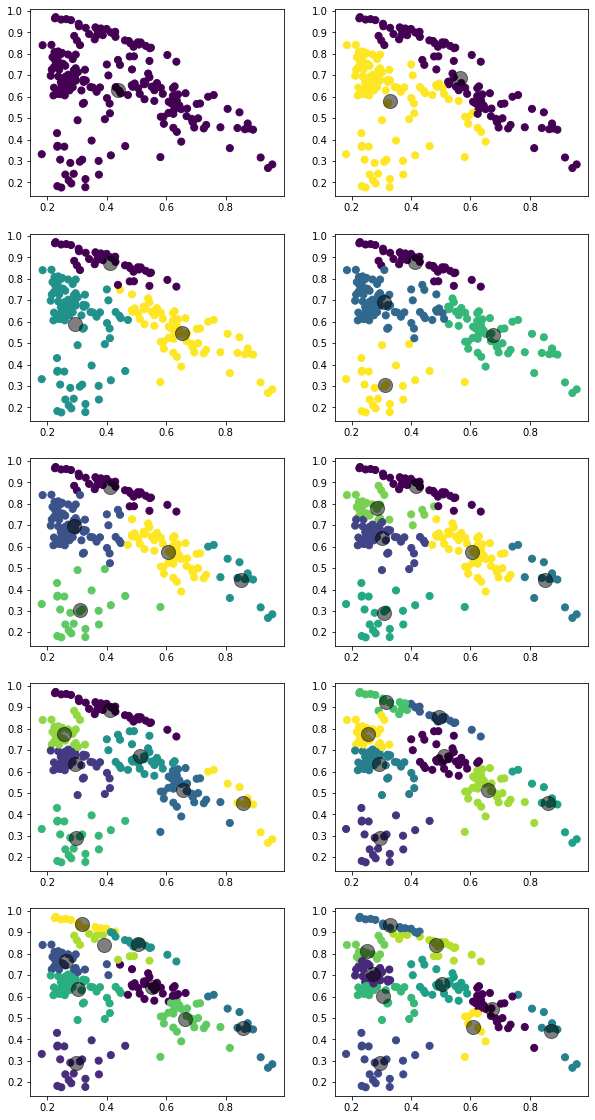

In [158]:
data=kmean(X_train_scaled,10)
plt.figure(figsize=[10,20])
for i in range(len(data[0])):
    plt.subplot(5,2,i+1)
    plt.scatter(X_train_scaled.iloc[:,0],X_train_scaled.iloc[:,1],s=50,c=data[1][i],cmap='viridis')
    centers=data[0][i].cluster_centers_
    plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
